Is Portugal a "safe country" among European countries? This short analysis will try analyse safe Portugal is, or at least how safe it feels for the residents. The data used from numbeo and is based on surveys, the data used is from mid 2018 and is avaliable at ('https://www.numbeo.com/crime/rankings_by_country.jsp?title=2018-mid&region=150') information how the indexes are calculated is also present there.

In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import re

In [2]:
#Read html with pandas
df = pd.read_html('https://www.numbeo.com/crime/rankings_by_country.jsp?title=2018-mid&region=150')
df

[    0                                                  1
 0 NaN  What are you looking for? Cost of Living Crime...,     0      1   2
 0 NaN  Tweet NaN,     Rank                 Country  Crime Index  Safety Index
 0    NaN                 Ukraine        50.00         50.00
 1    NaN                  Sweden        49.88         50.12
 2    NaN                  France        45.96         54.04
 3    NaN                   Italy        45.18         54.82
 4    NaN  Bosnia And Herzegovina        44.70         55.30
 5    NaN                 Moldova        44.62         55.38
 6    NaN                 Ireland        43.95         56.05
 7    NaN                  Russia        43.63         56.37
 8    NaN          United Kingdom        41.60         58.40
 9    NaN                 Belgium        41.50         58.50
 10   NaN                Bulgaria        40.28         59.72
 11   NaN                 Albania        40.00         60.00
 12   NaN               Macedonia        39.94         

In [3]:
#Select the table only
europe_crime_table = df[2]
europe_crime_table

,Rank,Country,Crime Index,Safety Index
0,NaN,Ukraine,50.00,50.00
1,NaN,Sweden,49.88,50.12
2,NaN,France,45.96,54.04
3,NaN,Italy,45.18,54.82
4,NaN,Bosnia And Herzegovina,44.70,55.30
5,NaN,Moldova,44.62,55.38
6,NaN,Ireland,43.95,56.05
7,NaN,Russia,43.63,56.37
8,NaN,United Kingdom,41.60,58.40
9,NaN,Belgium,41.50,58.50


In [4]:
#Set country as index, drop rank and sort values in ascending order 
europe_crime_table = europe_crime_table.set_index("Country")
europe_crime_table = europe_crime_table.drop(labels="Rank", axis=1)
europe_crime_table = europe_crime_table.sort_values(by=["Crime Index", "Safety Index"])
europe_crime_table

,Crime Index,Safety Index
Country,,
Estonia,20.33,79.67
Austria,21.50,78.50
Switzerland,22.08,77.92
Finland,22.64,77.36
Denmark,22.71,77.29
Iceland,23.64,76.36
Slovenia,24.44,75.56
Belarus,26.18,73.82
Croatia,26.94,73.06


In [5]:
print(europe_crime_table.describe())
europe_crime_table.loc["Portugal"]

       Crime Index  Safety Index
count    39.000000     39.000000
mean     35.022564     64.977436
std       8.416250      8.416250
min      20.330000     50.000000
25%      28.055000     59.110000
50%      36.770000     63.230000
75%      40.890000     71.945000
max      50.000000     79.670000


Crime Index     33.79
Safety Index    66.21
Name: Portugal, dtype: float64

Portugal seems to be safe comparetively speaking (below the mean in crime index) and just barely above in safety index.
However the data also includes many non-EU countries which tend to be higher in crime. So let's see how it plays out in when it's only EU countries.

In [6]:
#Webscrap a list of all EU countries from a crediable source "https://www.gov.uk/eu-eea"
page = requests.get("https://www.gov.uk/eu-eea")
soup = BeautifulSoup(page.content, 'html.parser')
eu_find = soup.find(string=re.compile("Austria,"))
print(eu_find)

Austria, Belgium, Bulgaria, Croatia, Republic of Cyprus, Czech Republic, Denmark, Estonia, Finland, France, Germany, Greece, Hungary, Ireland, Italy, Latvia, Lithuania, Luxembourg, Malta, Netherlands, Poland, Portugal, Romania, Slovakia, Slovenia, Spain, Sweden and the UK.


In [26]:
#Turn it in a list
eu_countries = eu_find.split(",")
print(eu_countries) #The last element needs to fixed
eu_countries[-1] = "Sweden"
eu_countries.append('United Kingdom')

['Austria', ' Belgium', ' Bulgaria', ' Croatia', ' Republic of Cyprus', ' Czech Republic', ' Denmark', ' Estonia', ' Finland', ' France', ' Germany', ' Greece', ' Hungary', ' Ireland', ' Italy', ' Latvia', ' Lithuania', ' Luxembourg', ' Malta', ' Netherlands', ' Poland', ' Portugal', ' Romania', ' Slovakia', ' Slovenia', ' Spain', ' Sweden and the UK.']


In [27]:
#Make a EU only countries data frame
eu_countries = [country.lstrip() for country in eu_countries] #Remove white spaces in order to be able to filter properly
print(eu_countries)

['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Republic of Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'United Kingdom']


In [33]:
eu_only = europe_crime_table[europe_crime_table.index.isin(eu_countries)] #EU only dataframe
print(eu_only.describe())
print(eu_only.loc["Portugal"])
eu_only

       Crime Index  Safety Index
count    27.000000     27.000000
mean     33.905926     66.094074
std       8.115227      8.115227
min      20.330000     50.120000
25%      28.055000     60.445000
50%      35.480000     64.520000
75%      39.555000     71.945000
max      49.880000     79.670000
Crime Index     33.79
Safety Index    66.21
Name: Portugal, dtype: float64


,Crime Index,Safety Index
Country,,
Estonia,20.33,79.67
Austria,21.50,78.50
Finland,22.64,77.36
Denmark,22.71,77.29
Slovenia,24.44,75.56
Croatia,26.94,73.06
Czech Republic,27.89,72.11
Netherlands,28.22,71.78
Romania,28.47,71.53


In this scenerio while Portugal seems somewhat safe, it is no longer in such a favorable position (much closer to the mean on crime rate) and it seems be near the median. Let's visualize with a bar plot to make more sense of it.

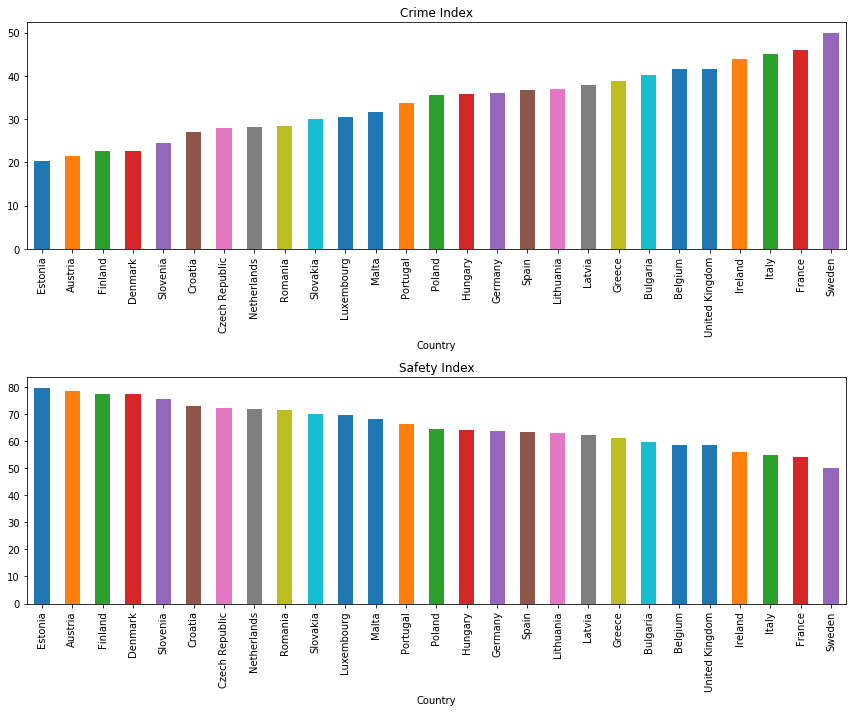

In [50]:
#Plotting
eu_only.reset_index()
fig, axes = plt.subplots(nrows=2, ncols=1)
for i, c in enumerate(eu_only.columns):
    eu_only[c].plot(kind='bar', ax=axes[i], figsize=(12, 10), title=c)
    fig.tight_layout()  #To keep graphs from overlapping

Again looks like overall within the EU Portuguese survey takers feel that Portugal is an country of comparetively average safety. 